In [208]:
import numpy as np 
import pandas as pd
import seaborn as sns

# Question 1 

For this question, you only need to do programming for Part 1.1 - 1.6. You will only be asked to provide answers in Part 1.7. 

In [209]:
PATH_TO_Q1_DATA = 'data/HW3_Q1_DATA_10000.csv'
df_original = pd.read_csv(PATH_TO_Q1_DATA)

### Data Exploration

In [210]:
df_original.shape

(9999, 19)

In [211]:
df_original.head()

,Sex,Intubated,Pneumonia,Age,Pregnant,Diabetes,COPD,Asthma,Immunocompromised,Hypertension,Other_Disease,Cardiovascular_disease,Obesity,Renal_disease,Smoker,Exposure_to_others_with_COVID,Has_COVID,ICU,Died
0,F,N,N,54,N,N,N,N,N,N,N,N,Y,N,N,NaN,Y,N,N
1,M,N,Y,30,NaN,N,N,N,N,N,N,N,N,N,N,NaN,Y,N,N
2,F,N,N,60,N,Y,N,N,N,Y,N,Y,N,N,N,NaN,Y,N,Y
3,M,N,Y,47,NaN,Y,N,N,N,N,N,N,N,N,N,NaN,Y,Y,Y
4,M,N,N,63,NaN,N,N,N,N,Y,N,N,N,N,N,NaN,Y,N,N


In [212]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sex                            9999 non-null   object
 1   Intubated                      9988 non-null   object
 2   Pneumonia                      9999 non-null   object
 3   Age                            9999 non-null   int64 
 4   Pregnant                       3719 non-null   object
 5   Diabetes                       9936 non-null   object
 6   COPD                           9949 non-null   object
 7   Asthma                         9950 non-null   object
 8   Immunocompromised              9946 non-null   object
 9   Hypertension                   9947 non-null   object
 10  Other_Disease                  9921 non-null   object
 11  Cardiovascular_disease         9944 non-null   object
 12  Obesity                        9933 non-null   object
 13  Ren

In [213]:
df_original['Died'].value_counts()

N    6373
Y    3626
Name: Died, dtype: int64

### Encode data

In [214]:
def encode_data_1(df):
    '''
    Encodes categorical data after dropping records with missing values, then returns a DataFrame of the result.
    '''
    
    # drop records with missing values
    df=df_original.dropna()
    print(df.shape)
    
    # convert categorical data to numerical values
    # drop one of each of the binary categories because it is not necessary (all info is encoded by one column)
    df=pd.get_dummies(df, drop_first=True)

    return df

In [215]:
df_encoding1 = encode_data_1(df_original)

(1719, 19)


In [216]:
df_encoding1.head()

,Age,Intubated_Y,Pneumonia_Y,Pregnant_Y,Diabetes_Y,COPD_Y,Asthma_Y,Immunocompromised_Y,Hypertension_Y,Other_Disease_Y,Cardiovascular_disease_Y,Obesity_Y,Renal_disease_Y,Smoker_Y,Exposure_to_others_with_COVID_Y,ICU_Y,Died_Y
8,25,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,52,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
27,51,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
29,67,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
34,59,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [217]:
df_encoding1.drop('Age',axis='columns').sum(axis='rows')

Intubated_Y                         263
Pneumonia_Y                        1295
Pregnant_Y                           43
Diabetes_Y                          564
COPD_Y                               76
Asthma_Y                             42
Immunocompromised_Y                  46
Hypertension_Y                      602
Other_Disease_Y                      56
Cardiovascular_disease_Y             76
Obesity_Y                           459
Renal_disease_Y                      75
Smoker_Y                             66
Exposure_to_others_with_COVID_Y     516
ICU_Y                               222
Died_Y                              451
dtype: int64

### DataFrame to store classifier metrics for all tests

In [218]:
# dataframe to collect results of all tests
df_results = pd.DataFrame(
    columns=['Test',
             'Description',
             'Accuracy',
             'Sensitivity',
             'Specificity',
             'Pos_Predictive_Val',
             'Neg_Predictive_Val',
             'F1_Score',
             'Matthew_Corr_Coef',
             'AUC'
            ]).astype(
    dtype= {'Test':'int64',
            'Description':'object',
            'Accuracy':'float64',
            'Sensitivity':'float64',
             'Specificity':'float64',
             'Pos_Predictive_Val':'float64',
             'Neg_Predictive_Val':'float64',
             'F1_Score':'float64',
             'Matthew_Corr_Coef':'float64',
             'AUC':'float64'
           })

## Part 1.1 Select features and train classifiers

### Part 1.1 Work 

In [219]:
# TODO: 
#   Step 1: Select and apply a filter-based or wrapper-based feature selection method to the data.
#   Step 2: Train a classifier using the selected features. Use 10-fold cross validation.

# Tip: 
#   1. You may find the filter-based or wrapper-based methods you used in HW2 useful. 

#   2. Scikit-learn implement many classifiers, see the comparisons of their 
#   performance and introductions here:
#   https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

#   3. Scikit-learn also implement classifiers with built-in cross validations,
#   for example: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html

#### Define wrapper-based feature selection method and classifier

In [220]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV

def perform_feature_selection_wrapper(X,y):
    svc = SVC(kernel="linear")
    rfecv = RFECV(estimator=svc, step=1, cv=5,scoring='accuracy',n_jobs=3)
    return rfecv.fit(X, y)
  
def get_feature_list(X, support):
    features = list()
    for i,val in enumerate(support):
        if val:
            features.append(X.columns[i]) # feature was selected by wrapper method
        
    return features

In [221]:
from sklearn.linear_model import RidgeClassifierCV

def build_X_from_features(X, list_features):
    return X.loc[:][list_features]

def train_classifier(X,y,k):
    clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=k)
    return clf.fit(X, y)

#### Separate encoded data into features and target

In [222]:
y_1_1 = df_encoding1.loc[:]['Died_Y']
print(y_1_1.shape)
X_1_1 = df_encoding1.drop('Died_Y',axis='columns')
print(X_1_1.shape)

(1719,)
(1719, 16)


#### Perform feature selection and classification

In [223]:
%%time 
# runtime - 3.4 s (1000 records, 10 fold, 3 cores)
# runtime - 6 min (10000 records, 10 fold, 3 cores)
# runtime - 6 min (23158 records, 10 fold, 3 cores)

# feature selection
rfecv = perform_feature_selection_wrapper(X_1_1,y_1_1)
features_wrapper = get_feature_list(X_1_1,rfecv.support_)

CPU times: user 3.28 s, sys: 53.9 ms, total: 3.33 s
Wall time: 2.65 s


In [224]:
%%time

# classification
X_1_1_classifier = build_X_from_features(X_1_1,features_wrapper)
clf_1_1 = train_classifier(X_1_1_classifier,y_1_1,10)

CPU times: user 372 ms, sys: 8.94 ms, total: 381 ms
Wall time: 104 ms


#### Calculate metrics and add row to results DataFrame
- Accuracy
- Sensitivity & Specificity
- The positive and negative predictive values 
- F1-score
- The Matthews Correlation Coefficient
- AUC (Area under the ROC curve)

In [225]:
from sklearn.metrics import confusion_matrix

def get_confusion_matrix(y_true,y_predict):
    '''
    Calculates the confusion matrix for a given X,y and classifier.
    '''
    # confusion matrix
    cm = confusion_matrix(y_true, y_predict)
    tn, fp, fn, tp = cm.ravel()
    
    return cm

In [226]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

def calc_classifier_metrics(cm, y_true, y_predict):
    
    tn, fp, fn, tp = cm.ravel()
    print('TN:',tn)
    print('FP:',fp)
    print('FN:',fn)
    print('TP:',tp)
    print('TOTAL:',tp + tn + fp + fn)
    
    # accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # sensitivity
    sen = tp / (tp + fn)
    
    # specificity
    spec = tn / (tn + fp)
    
    # precision
    prec = tn / (tn + fp)
    
    # positive predictive value
    ppv = tp / (fp + tp) # ?? check correctness
    
    # negative predictive value
    npv = tn / (fn + tn)
    
    # f1 score
    f1 = 2 * (prec * sen) / (prec + sen) 
    
    # matthew correlation coefficient
    mcc = matthews_corrcoef(y_true,y_predict)
    
    # area Under the receiver (AUC)
    auc = roc_auc_score(y_true, y_predict)
    
    # return numpy array  
    metrics = [acc,sen,spec,ppv,npv,f1,mcc,auc]
    return metrics

In [227]:
def add_row(df, test, description, metrics):
    
    data = [test,description] + metrics  
    new_row = pd.Series(data, index = df.columns)
    return df.append(new_row,ignore_index=True)

def add_metrics_to_table(df, test, description, X, y, clf):
    
    # for validation purposes
    print(clf.score(X,y),'\n')
    
    # calculate confusion matrix
    y_predict = clf.predict(X)
    y_real = y
    cm = get_confusion_matrix(y_real,y_predict)
    
    # calculate metrics
    metrics = calc_classifier_metrics(cm,y_real,y_predict)
    print('\n',metrics)
    
    # add row to results DataFrame
    return add_row(df, test, description, metrics)

In [228]:
df_results = add_metrics_to_table(df_results, 1, "Wrapper", X_1_1_classifier, y_1_1, clf_1_1)

0.787085514834206 

TN: 1179
FP: 89
FN: 277
TP: 174
TOTAL: 1719

 [0.787085514834206, 0.3858093126385809, 0.9298107255520505, 0.6615969581749049, 0.8097527472527473, 0.5453392719718327, 0.3857037879360513, 0.6578100190953157]


In [229]:
df_results

,Test,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.787086,0.385809,0.929811,0.661597,0.809753,0.545339,0.385704,0.65781


### Part 1.2 Work 

In [230]:
# TODO: 
#   Step 1: Select a learning algorithm that performs embedded feature selection. 
#   Step 2: Train a classifier using the selected features. Use 10-fold cross validation.

# Tip: 
#   1. Scikit-learn implement many classifiers, see the comparisons of their 
#   performance and introductions here:
#   https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

#   2. Scikit-learn also implement classifiers with built-in cross validations,
#   for example: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html

#### Define embedded feature selection method

In [231]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

def perform_feature_selection_embedded(X,y):
    sel = SelectFromModel(RandomForestClassifier())
    return sel.fit(X, y)

#### Perform feature selection and classification

In [232]:
from sklearn.model_selection import train_test_split

X_1_2 = X_1_1
y_1_2 = y_1_1

# split data
X_train_embedded,X_test_embedded,y_train_embedded,y_test_embedded = train_test_split(X_1_2,
                                                                                     y_1_2,
                                                                                     test_size=0.33)

In [233]:
%%time

# feature selection
rfc = perform_feature_selection_embedded(X_train_embedded, y_train_embedded) #?? revisit to do 10-fold version
features_embedded = get_feature_list(X_train_embedded,rfc.get_support())

CPU times: user 194 ms, sys: 9.45 ms, total: 203 ms
Wall time: 205 ms


In [234]:
%%time

# classification
X_1_2_classifier = build_X_from_features(X_1_2,features_embedded)
clf_1_2 = train_classifier(X_1_2_classifier,y_1_2,10)

CPU times: user 430 ms, sys: 10 ms, total: 440 ms
Wall time: 127 ms


In [235]:
features_embedded

['Age', 'Intubated_Y']

#### Calculate metrics and add row to results DataFrame

In [236]:
df_results = add_metrics_to_table(df_results, 2, "Embedded", X_1_2_classifier, y_1_2, clf_1_2)

0.7859220477021525 

TN: 1189
FP: 79
FN: 289
TP: 162
TOTAL: 1719

 [0.7859220477021525, 0.35920177383592017, 0.9376971608832808, 0.6721991701244814, 0.8044654939106901, 0.5194274966123062, 0.3761930767176986, 0.6484494673596004]


In [237]:
df_results

,Test,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.787086,0.385809,0.929811,0.661597,0.809753,0.545339,0.385704,0.657810
1,2,Embedded,0.785922,0.359202,0.937697,0.672199,0.804465,0.519427,0.376193,0.648449


### Part 1.3 Work 

In [238]:
# TODO: 
#   Step 1: Select and apply a data imputation method to handle the missing data.
#   Step 2: Apply the  wrapper based feature selection method you used in part 1.1.
#   Step 3: Train a classifier using the selected features. Use the same classifier you used in part 1.1. Use 10-fold cross validation.

# Tip: 
#   1. Sciki-learn implements different imputation methods. Take a look at https://scikit-learn.org/stable/modules/impute.html
#   and use the one you think most appropriate.

#### Impute missing values

In [239]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="most_frequent")

In [240]:
ndarray_imputed = imp.fit_transform(df_original)

In [241]:
print(ndarray_imputed.shape)
print(type(ndarray_imputed))

print(ndarray_imputed.dtype.names)
ndarray_imputed

(9999, 19)
<class 'numpy.ndarray'>
None


array([['F', 'N', 'N', ..., 'Y', 'N', 'N'],
       ['M', 'N', 'Y', ..., 'Y', 'N', 'N'],
       ['F', 'N', 'N', ..., 'Y', 'N', 'Y'],
       ...,
       ['M', 'N', 'N', ..., 'Y', 'N', 'N'],
       ['F', 'N', 'Y', ..., 'Y', 'N', 'N'],
       ['M', 'N', 'Y', ..., 'Y', 'N', 'N']], dtype=object)

In [242]:
# convert back to DataFrame
df_imputed = pd.DataFrame(ndarray_imputed, columns=df_original.columns)
df_imputed.head()

,Sex,Intubated,Pneumonia,Age,Pregnant,Diabetes,COPD,Asthma,Immunocompromised,Hypertension,Other_Disease,Cardiovascular_disease,Obesity,Renal_disease,Smoker,Exposure_to_others_with_COVID,Has_COVID,ICU,Died
0,F,N,N,54,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N
1,M,N,Y,30,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N
2,F,N,N,60,N,Y,N,N,N,Y,N,Y,N,N,N,N,Y,N,Y
3,M,N,Y,47,N,Y,N,N,N,N,N,N,N,N,N,N,Y,Y,Y
4,M,N,N,63,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N


In [243]:
df_original.head()

,Sex,Intubated,Pneumonia,Age,Pregnant,Diabetes,COPD,Asthma,Immunocompromised,Hypertension,Other_Disease,Cardiovascular_disease,Obesity,Renal_disease,Smoker,Exposure_to_others_with_COVID,Has_COVID,ICU,Died
0,F,N,N,54,N,N,N,N,N,N,N,N,Y,N,N,NaN,Y,N,N
1,M,N,Y,30,NaN,N,N,N,N,N,N,N,N,N,N,NaN,Y,N,N
2,F,N,N,60,N,Y,N,N,N,Y,N,Y,N,N,N,NaN,Y,N,Y
3,M,N,Y,47,NaN,Y,N,N,N,N,N,N,N,N,N,NaN,Y,Y,Y
4,M,N,N,63,NaN,N,N,N,N,Y,N,N,N,N,N,NaN,Y,N,N


In [244]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sex                            9999 non-null   object
 1   Intubated                      9999 non-null   object
 2   Pneumonia                      9999 non-null   object
 3   Age                            9999 non-null   object
 4   Pregnant                       9999 non-null   object
 5   Diabetes                       9999 non-null   object
 6   COPD                           9999 non-null   object
 7   Asthma                         9999 non-null   object
 8   Immunocompromised              9999 non-null   object
 9   Hypertension                   9999 non-null   object
 10  Other_Disease                  9999 non-null   object
 11  Cardiovascular_disease         9999 non-null   object
 12  Obesity                        9999 non-null   object
 13  Ren

In [245]:
# convert Age to int64 data type
df_imputed = df_imputed.astype({'Age': 'int64'})

In [246]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sex                            9999 non-null   object
 1   Intubated                      9999 non-null   object
 2   Pneumonia                      9999 non-null   object
 3   Age                            9999 non-null   int64 
 4   Pregnant                       9999 non-null   object
 5   Diabetes                       9999 non-null   object
 6   COPD                           9999 non-null   object
 7   Asthma                         9999 non-null   object
 8   Immunocompromised              9999 non-null   object
 9   Hypertension                   9999 non-null   object
 10  Other_Disease                  9999 non-null   object
 11  Cardiovascular_disease         9999 non-null   object
 12  Obesity                        9999 non-null   object
 13  Ren

#### Convert categorical data to numerical

In [247]:
def encode_data_2(df):
    '''
    Encodes categorical data then returns a DataFrame of the result.
    '''
    
    # convert categorical data to numerical values
    # drop one of each of the binary categories because it is not necessary (all info is encoded by one column)
    df=pd.get_dummies(df, drop_first=True)

    return df

In [248]:
df_imputed_encoded = encode_data_2(df_imputed)

In [249]:
df_imputed_encoded.head()

,Age,Sex_M,Intubated_Y,Pneumonia_Y,Pregnant_Y,Diabetes_Y,COPD_Y,Asthma_Y,Immunocompromised_Y,Hypertension_Y,Other_Disease_Y,Cardiovascular_disease_Y,Obesity_Y,Renal_disease_Y,Smoker_Y,Exposure_to_others_with_COVID_Y,ICU_Y,Died_Y
0,54,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,30,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
3,47,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1
4,63,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [250]:
# separate into features and target 
X_1_3 = df_imputed_encoded.drop('Died_Y', axis='columns')
y_1_3 = df_imputed_encoded['Died_Y']
print(X_1_3.shape)
print(y_1_3.shape)

(9999, 17)
(9999,)


In [251]:
#?? remove small dataset

X_1_3_small = X_1_3[:10000]
y_1_3_small = y_1_3[:10000]
print(X_1_3_small.shape)
print(y_1_3_small.shape)

(9999, 17)
(9999,)


#### Apply wrapper based feature selection

In [252]:
%%time 
# runtime - 8 min (30000 records, 10 fold, 3 cores)

# feature selection
rfecv_imputed = perform_feature_selection_wrapper(X_1_3_small,y_1_3_small)
features_wrapper_imputed = get_feature_list(X_1_3_small,rfecv_imputed.support_)

CPU times: user 47.2 s, sys: 1.82 s, total: 49 s
Wall time: 1min 42s


In [253]:
features_wrapper_imputed

['Intubated_Y']

#### Train classifier

In [254]:
%%time

# classification
X_1_3_classifier = build_X_from_features(X_1_3_small,features_wrapper_imputed)
clf_1_3 = train_classifier(X_1_3_classifier,y_1_3_small,10)

CPU times: user 503 ms, sys: 7.34 ms, total: 510 ms
Wall time: 139 ms


#### Add classifier metrics to results DataFrame

In [255]:
df_results = add_metrics_to_table(df_results, 
                                  3, 
                                  "Wrapper Imputed", 
                                  X_1_3_classifier, 
                                  y_1_3, 
                                  clf_1_3)

0.6758675867586759 

TN: 6073
FP: 300
FN: 2941
TP: 685
TOTAL: 9999

 [0.6758675867586759, 0.18891340319911748, 0.9529264082849521, 0.6954314720812182, 0.6737297537164411, 0.3153166827375656, 0.22882691859649743, 0.5709199057420348]


In [256]:
df_results

,Test,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.787086,0.385809,0.929811,0.661597,0.809753,0.545339,0.385704,0.657810
1,2,Embedded,0.785922,0.359202,0.937697,0.672199,0.804465,0.519427,0.376193,0.648449
2,3,Wrapper Imputed,0.675868,0.188913,0.952926,0.695431,0.673730,0.315317,0.228827,0.570920


### Part 1.4 Work 

In [257]:
# TODO: 
#   Step 1: Apply a data imputation method to eliminate any missing values in the data. Use the same method you used in part 1.3. 
#   Step 2: Train a classifier. Use the same classifier you used in part 1.2. Use 10-fold cross validation.

#### Perform feature selection and classification

In [258]:
#?? need to repeat work here if I can just use the values from above
X_1_4=X_1_3
y_1_4=y_1_3

# split data
X_train_embedded_i,X_test_embedded_i,y_train_embedded_i,y_test_embedded_i = train_test_split(
    X_1_4,
    y_1_4,
    test_size=0.33)

In [259]:
%%time

# feature selection
rfc = perform_feature_selection_embedded(X_train_embedded_i, y_train_embedded_i) #?? revisit to do 10-fold version
features_embedded_imputed = get_feature_list(X_1_4,rfc.get_support())

CPU times: user 848 ms, sys: 17.1 ms, total: 865 ms
Wall time: 481 ms


In [260]:
%%time

# classification
X_1_4_classifier = build_X_from_features(X_1_4,features_embedded_imputed)
clf_1_4 = train_classifier(X_1_4_classifier,y_1_4,10)

CPU times: user 606 ms, sys: 9.67 ms, total: 615 ms
Wall time: 165 ms


In [261]:
features_embedded_imputed

['Age', 'Intubated_Y']

#### Calculate metrics and add row to results DataFrame

In [262]:
df_results = add_metrics_to_table(df_results, 
                                  4, 
                                  "Embedded Imputed", 
                                  X_1_4_classifier, 
                                  y_1_4, 
                                  clf_1_4)

0.6870687068706871 

TN: 5722
FP: 651
FN: 2478
TP: 1148
TOTAL: 9999

 [0.6870687068706871, 0.3166023166023166, 0.8978503059783461, 0.6381322957198443, 0.6978048780487804, 0.4681310436479589, 0.2684075407603472, 0.6072263112903314]


In [263]:
df_results

,Test,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.787086,0.385809,0.929811,0.661597,0.809753,0.545339,0.385704,0.657810
1,2,Embedded,0.785922,0.359202,0.937697,0.672199,0.804465,0.519427,0.376193,0.648449
2,3,Wrapper Imputed,0.675868,0.188913,0.952926,0.695431,0.673730,0.315317,0.228827,0.570920
3,4,Embedded Imputed,0.687069,0.316602,0.897850,0.638132,0.697805,0.468131,0.268408,0.607226


### Part 1.5 Work 

In [264]:
# TODO: 
#   Step 1: Apply a data imputation method to eliminate any missing values in the data. Use the same method you used in parts 1.3 & 1.4. 
#   Step 2: Select a learning algorithm that performs cost-sensitive learning. 
#   Step 3: Adjust the costs until you find a classifier that maximizes the F1-score, subject to the constraint that it achieves 95% sensitivity for the label ‘Y’.  Use 10-fold cross validation.

# Tip: 
#   1. F1-score: https://en.wikipedia.org/wiki/F1_score
#   2. Scikit-learn supports extending the classifiers to cost-sensitive learning.
#   Take a look at this tutorial: https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/

#### Apply same data imputation method

In [267]:
#?? need to repeat work here if I can just use the values from above

# separate into features and target 
X_1_5 = X_1_4
y_1_5 = y_1_4

In [268]:
y_1_5.value_counts()

0    6373
1    3626
Name: Died_Y, dtype: int64

#### Feature Selection?

In [269]:
##?? are we performing feature selection here
X_1_5_classifier = X_1_5

#### Find correct weights for cost-sensitive classifier

In [270]:
def train_cost_sensitive_classifier(X,y,k,weights):
    clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=k, class_weight=weights)
    return clf.fit(X, y)

In [271]:
def run_base_case(X,y):
    # base case
    clf = train_cost_sensitive_classifier(X,y,10,'balanced')

    # calculate confusion matrix
    y_predict = clf.predict(X)
    y_real = y
    cm = get_confusion_matrix(y_real,y_predict)

    # calculate metrics
    metrics = calc_classifier_metrics(cm,y_real,y_predict)
    print('\nSensitivity:',metrics[1])
    print('F-score:',metrics[5])
    
run_base_case(X_1_5_classifier,y_1_5)

TN: 4276
FP: 2097
FN: 1157
TP: 2469
TOTAL: 9999

Sensitivity: 0.6809156094870381
F-score: 0.6758989111071539


In [272]:
def calc_sensitivity_and_f1(cm):
    
    tn, fp, fn, tp = cm.ravel()
    
    # sensitivity
    sen = tp / (tp + fn)
    
    # specificity
    spec = tn / (tn + fp)
    
    # precision
    prec = tn / (tn + fp)
    
    # f1 score
    f1 = 2 * (prec * sen) / (prec + sen) 
    
    return (sen,f1)

In [273]:
def find_zero_weight_to_maximize_f1(X,y):
    
    zero_weight=0.0
    max_f1=0.0
    zero_weight_for_max=0.0
    while zero_weight < 0.2:
        zero_weight = round(zero_weight + 0.005,3)
        one_weight = round(1 - zero_weight,3)
        
        print(zero_weight,one_weight)
        clf = train_cost_sensitive_classifier(X,y,10,{0:zero_weight, 1:one_weight})

        # calculate confusion matrix
        y_predict = clf.predict(X)
        y_real = y
        cm = get_confusion_matrix(y_real,y_predict)

        # calculate metrics
        sen,f1 = calc_sensitivity_and_f1(cm)
        if sen >= 0.95 and f1 > max_f1:
            max_f1 = f1
            zero_weight_for_max=zero_weight
            
    print('max_f1:',max_f1)
    print('zero_weight for max_f1:',zero_weight_for_max)
    return zero_weight_for_max

#### Calculate metrics for best classifier and add row to results DataFrame

In [274]:
%%time

best_zero = find_zero_weight_to_maximize_f1(X_1_5_classifier,y_1_5)
best_one = round(1-best_zero,3)
print()
print(best_zero)
print(best_one)

0.005 0.995
0.01 0.99
0.015 0.985
0.02 0.98
0.025 0.975
0.03 0.97
0.035 0.965
0.04 0.96
0.045 0.955
0.05 0.95
0.055 0.945
0.06 0.94
0.065 0.935
0.07 0.93
0.075 0.925
0.08 0.92
0.085 0.915
0.09 0.91
0.095 0.905
0.1 0.9
0.105 0.895
0.11 0.89
0.115 0.885
0.12 0.88
0.125 0.875
0.13 0.87
0.135 0.865
0.14 0.86
0.145 0.855
0.15 0.85
0.155 0.845
0.16 0.84
0.165 0.835
0.17 0.83
0.175 0.825
0.18 0.82
0.185 0.815
0.19 0.81
0.195 0.805
0.2 0.8
max_f1: 0.42117987714286365
zero_weight for max_f1: 0.19

0.19
0.81
CPU times: user 35.2 s, sys: 940 ms, total: 36.2 s
Wall time: 9.2 s


In [275]:
clf_1_5 = train_cost_sensitive_classifier(X_1_5_classifier,y_1_5,10,{0:best_zero, 1:best_one})

In [276]:
df_results = add_metrics_to_table(df_results, 
                                  5, 
                                  "Cost Sensitive Imputed", 
                                  X_1_5_classifier, 
                                  y_1_5, 
                                  clf_1_5)

0.5171517151715171 

TN: 1724
FP: 4649
FN: 179
TP: 3447
TOTAL: 9999

 [0.5171517151715171, 0.950634307777165, 0.2705162403891417, 0.42576581027667987, 0.905937992643195, 0.42117987714286365, 0.27084401016928333, 0.6105752740831534]


In [277]:
df_results

,Test,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.787086,0.385809,0.929811,0.661597,0.809753,0.545339,0.385704,0.657810
1,2,Embedded,0.785922,0.359202,0.937697,0.672199,0.804465,0.519427,0.376193,0.648449
2,3,Wrapper Imputed,0.675868,0.188913,0.952926,0.695431,0.673730,0.315317,0.228827,0.570920
3,4,Embedded Imputed,0.687069,0.316602,0.897850,0.638132,0.697805,0.468131,0.268408,0.607226
4,5,Cost Sensitive Imputed,0.517152,0.950634,0.270516,0.425766,0.905938,0.421180,0.270844,0.610575


### Part 1.6 Work 

In [278]:
# TODO: 
#   Step 1: Implement a function calculating the weighted average F1-score, following 
#       the steps in the homework problem statement.
#   Step 2: Find a classifier that achieves a weighted average F1-score of at least 0.74 using 10-fold cross validation.

# Tip: 
#   1. F1-score: https://en.wikipedia.org/wiki/F1_score
#   2. Scikit-learn supports extending the classifiers to cost-sensitive learning.
#   Take a look at this tutorial: https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/

In [279]:
def weighted_f1(cm):
    '''
    Calculates a weighted F1-score using given confusion matrix cm. 
    '''
    
    tn, fp, fn, tp = cm.ravel()
    
    # F1 score computed using label 'Y' as true positive ??
    F_1_Y = tp / (tp + 0.5 * (fp + fn))
    
    # F1 score computed using label 'N' as true positive ??
    F_1_N = tn / (tn + 0.5 * (fp + fn))
    
    # number of instances with label 'Y'
    n_Y = tp + fp
    
    # number of instances with label 'N'
    n_N = tn + fn
    
    
    # calculate weights
    a = n_Y / (n_Y + n_N) #?? check on this
    
    b = n_N / (n_Y + n_N) #?? check on this
    
    
    # calculated weighted f1
    f1_weighted = (a * F_1_Y) + (b * F_1_N) #?? check on this
    
    return f1_weighted

In [280]:
# data
X_1_6_classifier = X_1_5
y_1_6 = y_1_5

#### Find a classifier

In [281]:
#?? todo
clf_1_6 = clf_1_5

#### Calculate metrics and add row to results DataFrame

In [282]:
# calculate confusion matrix
y_predict = clf_1_6.predict(X_1_6_classifier)
y_real = y_1_6
cm = get_confusion_matrix(y_real,y_predict)

print(weighted_f1(cm))

0.5554854641463256


In [283]:
df_results = add_metrics_to_table(df_results, 
                                  6, 
                                  "Weighted F1", 
                                  X_1_6_classifier, 
                                  y_1_6, 
                                  clf_1_6)

0.5171517151715171 

TN: 1724
FP: 4649
FN: 179
TP: 3447
TOTAL: 9999

 [0.5171517151715171, 0.950634307777165, 0.2705162403891417, 0.42576581027667987, 0.905937992643195, 0.42117987714286365, 0.27084401016928333, 0.6105752740831534]


In [284]:
df_results

,Test,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.787086,0.385809,0.929811,0.661597,0.809753,0.545339,0.385704,0.657810
1,2,Embedded,0.785922,0.359202,0.937697,0.672199,0.804465,0.519427,0.376193,0.648449
2,3,Wrapper Imputed,0.675868,0.188913,0.952926,0.695431,0.673730,0.315317,0.228827,0.570920
3,4,Embedded Imputed,0.687069,0.316602,0.897850,0.638132,0.697805,0.468131,0.268408,0.607226
4,5,Cost Sensitive Imputed,0.517152,0.950634,0.270516,0.425766,0.905938,0.421180,0.270844,0.610575
5,6,Weighted F1,0.517152,0.950634,0.270516,0.425766,0.905938,0.421180,0.270844,0.610575


### Part 1.7 Work

In [285]:
# Tip:
#   1. Scikit-learn implements different evaluation metrics for classifications,
#   see: https://scikit-learn.org/stable/modules/model_evaluation.html

### Part 1.7 Answers

1. Create a ROC plot with the results from parts 1.1 to 1.6. 
2. Create a table with the following performance metrics for the results from parts 1.1 to 1.6:
    * Accuracy
    * Sensitivity & Specificity
    * The positive and negative predictive values
    * F1-score
    * The Matthews Correlation Coefficient
    * AUC (Area under the ROC curve)

#### ROC Plot Example from 1.1.5

In [286]:
#?? use weighted F1 or regular F1
#?? can we complete ROC plot with the metric information we collected earlier?

In [287]:
from sklearn.metrics import roc_curve

# calculate confusion matrix
y_predict = clf_1_5.predict(X_1_5_classifier)
y_real = y_1_5
cm = get_confusion_matrix(y_real,y_predict)
    
fpr, tpr, thresholds = roc_curve(y_real, y_predict)

In [288]:
auc = roc_auc_score(y_real, y_predict)

In [289]:
import matplotlib.pyplot as plt

def plot_roc(fpr,tpr,auc):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='1.5 Cost-Sensitive ROC (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

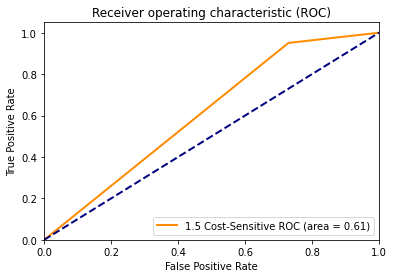

In [290]:
plot_roc(fpr,tpr,auc)

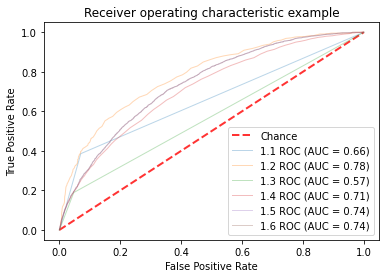

In [293]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver operating characteristic example")
ax.legend(loc="lower right")

# plot all results on one graph

# 1.1 wrapper method
plot_roc_curve(clf_1_1, X_1_1_classifier, y_1_1,name='1.1 ROC',alpha=0.3, lw=1, ax=ax)

# 1.2 embedded method
plot_roc_curve(clf_1_2, X_1_2_classifier, y_1_2,name='1.2 ROC',alpha=0.3, lw=1, ax=ax)

# 1.3 wrapper method + imputed data
plot_roc_curve(clf_1_3, X_1_3_classifier, y_1_3,name='1.3 ROC',alpha=0.3, lw=1, ax=ax)

# 1.4 embedded method + imputed data
plot_roc_curve(clf_1_4, X_1_4_classifier, y_1_4,name='1.4 ROC',alpha=0.3, lw=1, ax=ax)

# 1.5 cost-sensitive
plot_roc_curve(clf_1_5, X_1_5_classifier, y_1_5,name='1.5 ROC',alpha=0.3, lw=1, ax=ax)

# 1.6 weighted average
plot_roc_curve(clf_1_6, X_1_6_classifier, y_1_6,name='1.6 ROC',alpha=0.3, lw=1, ax=ax)

plt.show()

#### Performance Metric Table

In [294]:
#?? need something else besides this
#?? update AUC values to match table
df_results

,Test,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.787086,0.385809,0.929811,0.661597,0.809753,0.545339,0.385704,0.657810
1,2,Embedded,0.785922,0.359202,0.937697,0.672199,0.804465,0.519427,0.376193,0.648449
2,3,Wrapper Imputed,0.675868,0.188913,0.952926,0.695431,0.673730,0.315317,0.228827,0.570920
3,4,Embedded Imputed,0.687069,0.316602,0.897850,0.638132,0.697805,0.468131,0.268408,0.607226
4,5,Cost Sensitive Imputed,0.517152,0.950634,0.270516,0.425766,0.905938,0.421180,0.270844,0.610575
5,6,Weighted F1,0.517152,0.950634,0.270516,0.425766,0.905938,0.421180,0.270844,0.610575
